In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/GC-Hackathon/training_set.csv")
x=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [4]:
x.shape

(227845, 29)

In [5]:
dataset = dataset.drop(['buffer'], axis = 1)

In [6]:
dataset.head(10)

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
0,134454,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,21.90,0
1,78980,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,2.99,0
2,55273,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,7.08,0
3,36417,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,7.68,0
4,154977,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,49.00,0
5,67706,-1.204396,0.895136,1.416752,-1.515809,-0.232933,-0.278645,0.470024,0.291977,0.256230,...,-0.094880,-0.079252,0.038514,0.017078,-0.360650,0.748521,0.510475,0.259724,30.00,0
6,51705,1.174498,0.363603,-0.213642,0.874376,0.561873,-0.105249,0.505197,-0.178866,-0.364710,...,-0.371282,-1.095817,0.010938,-0.791478,0.473820,-0.669108,0.019495,0.023306,52.05,0
7,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0
8,159573,2.008964,-0.026310,-1.837550,0.313541,0.272992,-0.816407,-0.017404,-0.074550,0.323780,...,0.202899,0.554954,0.058351,0.694446,0.000615,0.627712,-0.083553,-0.045078,16.07,0
9,19901,1.337836,-0.587493,0.724083,-0.300644,-1.207252,-0.605452,-0.840063,-0.033971,0.788198,...,-0.123340,-0.122951,0.008669,0.461695,0.427552,-0.307951,-0.025863,-0.004419,10.00,0


In [7]:
dataset['Class'].sum()

400

In [8]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}')


Time: [134454  78980  55273 ... 139712  42964  42853]
P1: [ 1.99738662 -0.85182304  1.11996283 ...  0.02057785  1.15162816
  1.92249746]
P2: [ 0.02863075  1.44607049  0.5460548  ... -0.30060018 -0.01172861
 -0.46416262]
P3: [-1.88504708  0.67975938  0.87785555 ...  0.51596431  1.19277978
  0.1475083 ]
P4: [ 0.34123406  0.00797332  2.41583278 ... -2.42356968  1.13558685
  0.34305528]
P5: [ 0.35026254  0.61780121 -0.28255398 ...  0.219863   -0.69428712
 -0.66568411]
P6: [-0.90029741 -1.21069503 -0.33636581 ...  0.17617976  0.3253029
  0.35575   ]
P7: [ 0.11935187  1.36963682  0.01874691 ... -0.10892754 -0.63714433
 -1.11752469]
P8: [-0.15774643 -0.44298526  0.04213506 ...  0.13181585  0.22368309
  0.18561354]
P9: [ 0.47474587 -0.46606005 -0.9822802  ... -0.88327916  0.55415902
  2.33486871]
P10: [-0.29622776 -0.01877438  0.84328598 ...  0.05485735 -0.04773753
 -0.24925436]
P11: [ 0.90851755 -0.52503042  1.3666721  ...  0.3085199   0.72914782
  1.89223692]
P12: [ 0.22124002  0.13662876  0

364.89599999999973
0.92


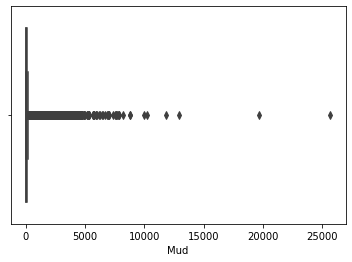

In [9]:
max_thresold = dataset['Mud'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['Mud'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['Mud']<max_thresold) & (dataset['Mud']>min_thresold)]
print(dataset[(dataset['Mud']>max_thresold) & (dataset['Mud']min_thresold)]["Class"].sum())
"""
sns.boxplot(x=dataset["Mud"])


2.2381772428
-6.5256609352


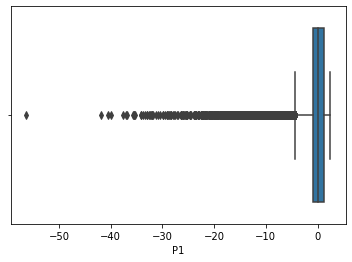

In [10]:
max_thresold = dataset['P1'].quantile(0.99)
print(max_thresold)


min_thresold = dataset['P1'].quantile(0.01)
print(min_thresold)

"""
dataset = dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]
print(dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P1"])

1.8059130689999998
-1.9744760289999999


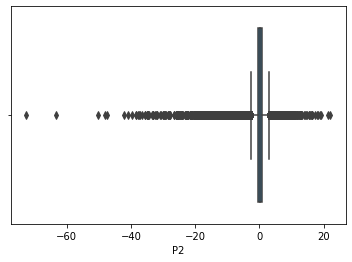

In [11]:
max_thresold = dataset['P2'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P2'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]
print(dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P2"])

2.0603833853999993
-2.3914704847999997


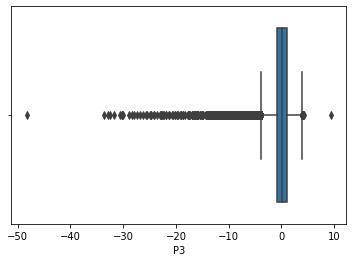

In [12]:
max_thresold = dataset['P3'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P3'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]
print(dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P3"])

2.5621568768
-2.1973994354


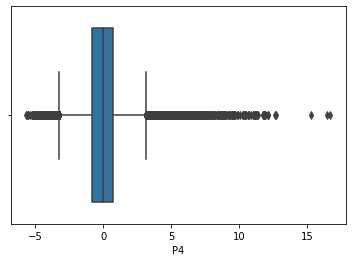

In [13]:
max_thresold = dataset['P4'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P4'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P4']<max_thresold) & (dataset['P4']>min_thresold)]
print(dataset[(dataset['P4']<max_thresold) & (dataset['P4']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P4"])

2.097925440599998
-1.7011095379999999


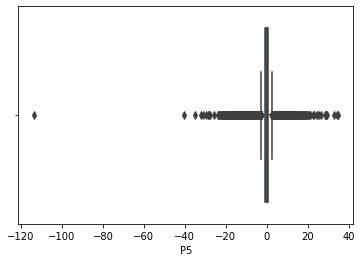

In [14]:
max_thresold = dataset['P5'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P5'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P5']<max_thresold) & (dataset['P5']>min_thresold)]
print(dataset[(dataset['P5']<max_thresold) & (dataset['P5']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P5"])

3.160352803999998
-1.408382936


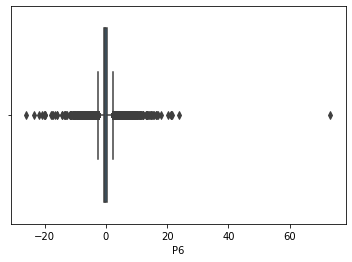

In [15]:
max_thresold = dataset['P6'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P6'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P6']<max_thresold) & (dataset['P6']>min_thresold)]
print(dataset[(dataset['P6']<max_thresold) & (dataset['P6']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P6"])

1.4064432371999989
-1.434387175


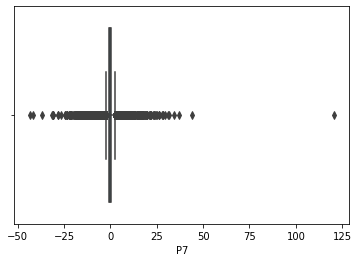

In [16]:
max_thresold = dataset['P7'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P7'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P7']<max_thresold) & (dataset['P7']>min_thresold)]
print(dataset[(dataset['P7']<max_thresold) & (dataset['P7']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P7"])

1.0485980213999992
-0.8507066254


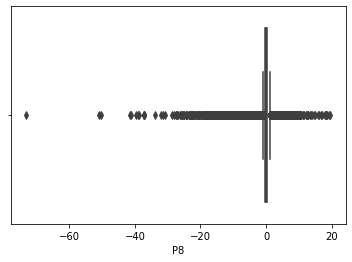

In [17]:
max_thresold = dataset['P8'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P8'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]
print(dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P8"])

1.7812399485999997
-1.7572971931999999


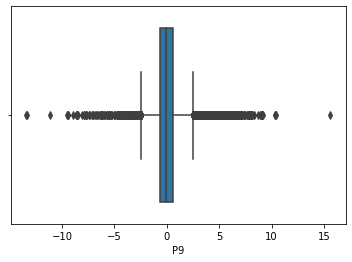

In [18]:
max_thresold = dataset['P9'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P9'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P9']<max_thresold) & (dataset['P9']>min_thresold)]
print(dataset[(dataset['P9']<max_thresold) & (dataset['P9']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P9"])

1.5484770681999998
-1.3395511846000001


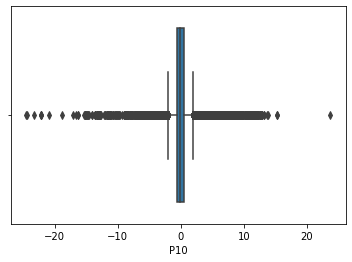

In [19]:
max_thresold = dataset['P10'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P10'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P10']<max_thresold) & (dataset['P10']>min_thresold)]
print(dataset[(dataset['P10']<max_thresold) & (dataset['P10']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P10"])

1.6131284425999994
-1.5765145418


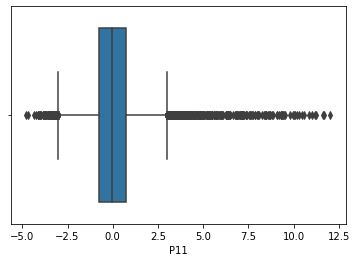

In [20]:
max_thresold = dataset['P11'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P11'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P11']<max_thresold) & (dataset['P11']>min_thresold)]
print(dataset[(dataset['P11']<max_thresold) & (dataset['P11']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P11"])

1.242983082799999
-1.9644966623999998


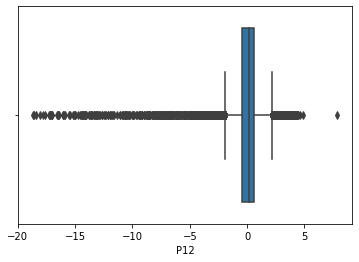

In [21]:
max_thresold = dataset['P12'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P12'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P12']<max_thresold) & (dataset['P12']>min_thresold)]
print(dataset[(dataset['P12']<max_thresold) & (dataset['P12']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P12"])

1.6049166671999997
-1.6395453463999998


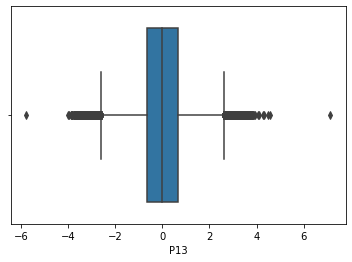

In [22]:
max_thresold = dataset['P13'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P13'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P13']<max_thresold) & (dataset['P13']>min_thresold)]
print(dataset[(dataset['P13']<max_thresold) & (dataset['P13']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P13"])

1.3920970049999997
-1.4437502418000001


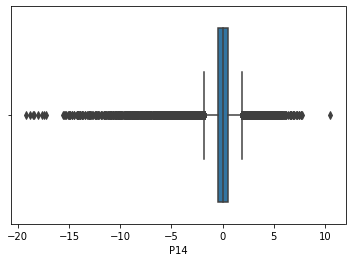

In [23]:
max_thresold = dataset['P14'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P14'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P14']<max_thresold) & (dataset['P14']>min_thresold)]
print(dataset[(dataset['P14']<max_thresold) & (dataset['P14']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P14"])

1.3744091538
-1.591650388


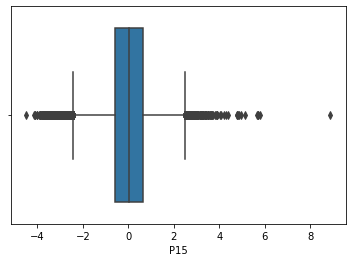

In [24]:
max_thresold = dataset['P15'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P15'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P15']<max_thresold) & (dataset['P15']>min_thresold)]
print(dataset[(dataset['P15']<max_thresold) & (dataset['P15']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P15"])

1.3243033913999995
-1.4962567951999999


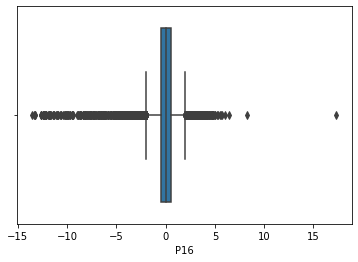

In [25]:
max_thresold = dataset['P16'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P16'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P16']<max_thresold) & (dataset['P16']>min_thresold)]
print(dataset[(dataset['P16']<max_thresold) & (dataset['P16']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P16"])

1.2764815541999999
-0.981633226


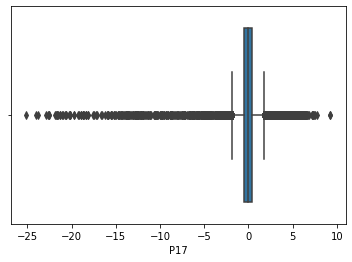

In [26]:
max_thresold = dataset['P17'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P17'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P17']<max_thresold) & (dataset['P17']>min_thresold)]
print(dataset[(dataset['P17']<max_thresold) & (dataset['P17']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P17"])

1.3933037115999987
-1.3628391564


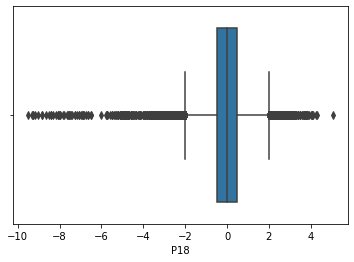

In [27]:
max_thresold = dataset['P18'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P18'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P18']<max_thresold) & (dataset['P18']>min_thresold)]
print(dataset[(dataset['P18']<max_thresold) & (dataset['P18']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P18"])

1.2874015135999997
-1.3565933118


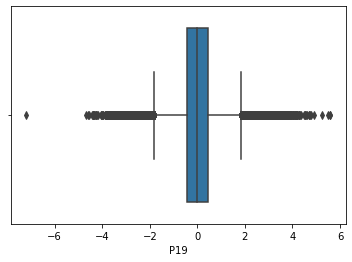

In [28]:
max_thresold = dataset['P19'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P19'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P19']<max_thresold) & (dataset['P19']>min_thresold)]
print(dataset[(dataset['P19']<max_thresold) & (dataset['P19']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P19"])

0.8364623495999994
-0.5603635337999999


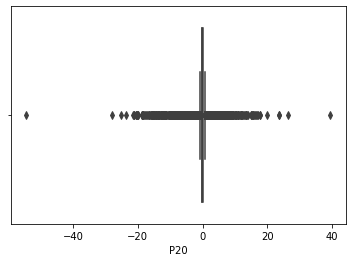

In [29]:
max_thresold = dataset['P20'].quantile(0.95)
print(max_thresold)

min_thresold = dataset['P20'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P20']<max_thresold) & (dataset['P20']>min_thresold)]
print(dataset[(dataset['P20']<max_thresold) & (dataset['P20']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P20"])

0.5401274583999993
-0.5036268145999999


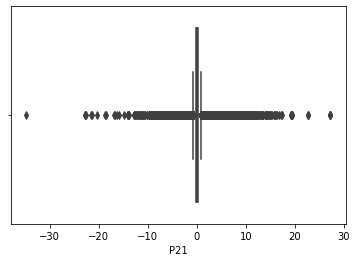

In [30]:
max_thresold = dataset['P21'].quantile(0.95)
print(max_thresold)

min_thresold = dataset['P21'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]
print(dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P21"])

1.1298653993999999
-1.0803271196


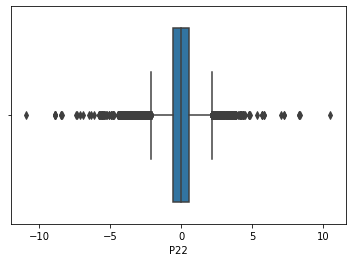

In [31]:
max_thresold = dataset['P22'].quantile(0.95)
print(max_thresold)

min_thresold = dataset['P22'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P22']<max_thresold) & (dataset['P22']>min_thresold)]
print(dataset[(dataset['P22']<max_thresold) & (dataset['P22']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P22"])

0.48831160659999984
-0.473210494


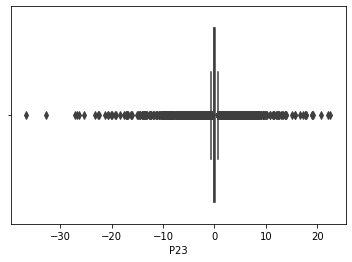

In [32]:
max_thresold = dataset['P23'].quantile(0.95)
print(max_thresold)

min_thresold = dataset['P23'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P23']<max_thresold) & (dataset['P23']>min_thresold)]
print(dataset[(dataset['P23']<max_thresold) & (dataset['P23']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P23"])

0.8636928489999997
-1.1449491696


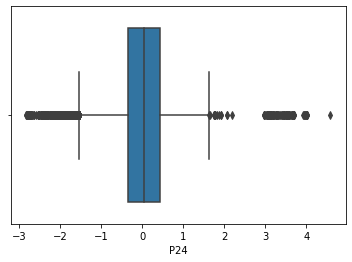

In [33]:
max_thresold = dataset['P24'].quantile(0.95)
print(max_thresold)

min_thresold = dataset['P24'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P24']<max_thresold) & (dataset['P24']>min_thresold)]
print(dataset[(dataset['P24']<max_thresold) & (dataset['P24']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P24"])

0.7618424555999996
-0.8259176157999999


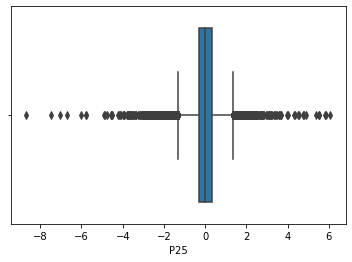

In [34]:
max_thresold = dataset['P25'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P25'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P25']<max_thresold) & (dataset['P25']>min_thresold)]
print(dataset[(dataset['P25']<max_thresold) & (dataset['P25']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P25"])

0.9196799927999996
-0.6976027238


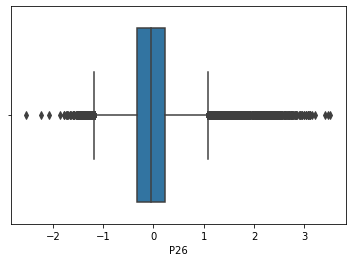

In [35]:
max_thresold = dataset['P26'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P26'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P26']<max_thresold) & (dataset['P26']>min_thresold)]
print(dataset[(dataset['P26']<max_thresold) & (dataset['P26']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P26"])

0.3882505977999992
-0.41500726019999995


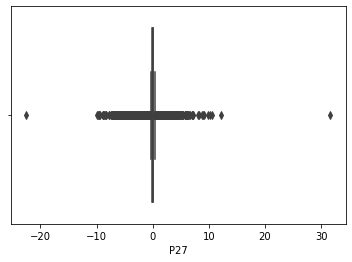

In [36]:
max_thresold = dataset['P27'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P27'].quantile(0.05)
print(min_thresold)

'''
dataset = dataset[(dataset['P27']<max_thresold) & (dataset['P27']>min_thresold)]
print(dataset[(dataset['P27']<max_thresold) & (dataset['P27']>min_thresold)]["Class"].sum())
'''

sns.boxplot(x=dataset["P27"])

0.25582104979999987
-0.3172958084
179


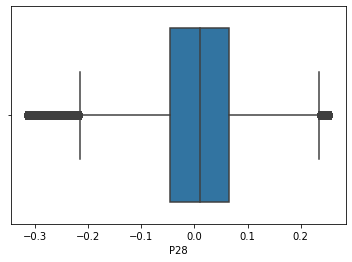

In [37]:
max_thresold = dataset['P28'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P28'].quantile(0.05)
print(min_thresold)

dataset = dataset[(dataset['P28']<max_thresold) & (dataset['P28']>min_thresold)]
print(dataset[(dataset['P28']<max_thresold) & (dataset['P28']>min_thresold)]["Class"].sum())

sns.boxplot(x=dataset["P28"])

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205059 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    205059 non-null  int64  
 1   P1      205059 non-null  float64
 2   P2      205059 non-null  float64
 3   P3      205059 non-null  float64
 4   P4      205059 non-null  float64
 5   P5      205059 non-null  float64
 6   P6      205059 non-null  float64
 7   P7      205059 non-null  float64
 8   P8      205059 non-null  float64
 9   P9      205059 non-null  float64
 10  P10     205059 non-null  float64
 11  P11     205059 non-null  float64
 12  P12     205059 non-null  float64
 13  P13     205059 non-null  float64
 14  P14     205059 non-null  float64
 15  P15     205059 non-null  float64
 16  P16     205059 non-null  float64
 17  P17     205059 non-null  float64
 18  P18     205059 non-null  float64
 19  P19     205059 non-null  float64
 20  P20     205059 non-null  float64
 21  P21     20

In [39]:
dataset.describe()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
count,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,...,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000,205059.000000
mean,94497.852072,0.300299,0.006252,0.051481,0.001621,-0.017534,0.003433,-0.024811,0.041088,-0.039707,...,0.004041,-0.016553,0.002957,-0.004089,0.014996,0.003865,0.004455,0.010283,75.878881,0.000873
std,47502.725355,1.480407,1.150533,1.356043,1.345266,1.111514,1.229607,0.903821,0.894426,1.012982,...,0.578662,0.694686,0.370205,0.602825,0.481723,0.480691,0.218770,0.099386,159.591653,0.029532
min,0.000000,-28.255053,-25.005993,-26.871339,-5.560118,-17.999630,-14.425011,-41.506796,-50.420090,-13.434066,...,-22.889347,-8.483441,-20.794422,-2.836627,-4.221212,-1.855355,-5.407824,-0.317280,0.000000,0.000000
25%,53941.500000,-0.750360,-0.589670,-0.844287,-0.817874,-0.691706,-0.748990,-0.555308,-0.189218,-0.650178,...,-0.218687,-0.550095,-0.152112,-0.358597,-0.301869,-0.323044,-0.065444,-0.046526,5.700000,0.000000
50%,84016.000000,0.558593,0.035423,0.198158,0.011342,-0.080481,-0.271825,0.016816,0.028022,-0.067142,...,-0.028347,-0.009472,-0.009507,0.038264,0.029114,-0.048563,0.000192,0.011025,21.950000,0.000000
75%,139164.000000,1.434057,0.730416,1.026907,0.730940,0.553880,0.375355,0.515838,0.316569,0.560060,...,0.179169,0.499052,0.140662,0.433049,0.352620,0.239238,0.075949,0.065599,74.950000,0.000000
max,172788.000000,2.454930,21.467203,4.187811,11.737436,20.277728,11.607923,21.915116,9.673941,7.730701,...,22.580675,8.361985,13.321114,4.022866,3.467907,3.517346,4.359143,0.255810,5714.200000,1.000000
